### <font color='purple'><b>1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Honeyproduction.csv')
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### <font color='purple'><b>2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
df.shape

(626, 8)

In [4]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
df.nunique()

state           44
numcol         148
yieldpercol     95
totalprod      517
stocks         500
priceperlb     210
prodvalue      589
year            15
dtype: int64

### <font color='purple'><b>3. Display the percentage distribution of the data in each year using the pie chart.

In [7]:
df['year'].value_counts()

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

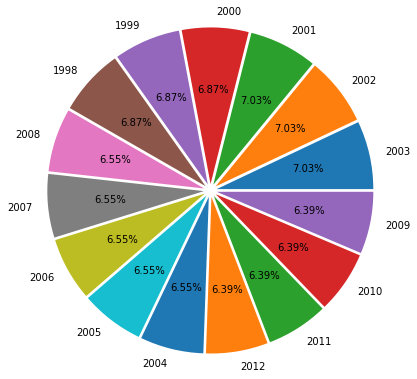

In [8]:
plt.figure(figsize=(10,6))
my_labels = '2003','2002','2001','2000','1999','1998','2008','2007','2006','2005','2004','2012','2011','2010','2009'
my_explode = (0.05,0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05) 
plt.pie(df.year.value_counts(),labels=my_labels,explode=my_explode,autopct = '%.2f%%', radius = 1.2, )
plt.show()

### <font color='purple'><b> 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

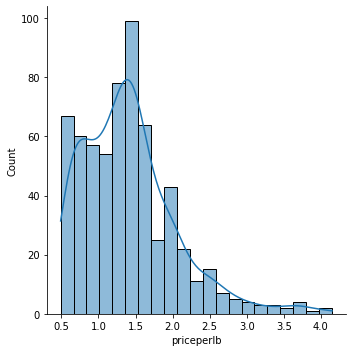

In [9]:
sns.displot(df["priceperlb"], kde=True)
plt.show()

### <font size=4 color='green'> INFERENCE:
- ####  Higher rates of Priceperlb comes between 1.0 to 2.0 dollars
- #### It is ppositively skewed    

### <font color='purple'><b>5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

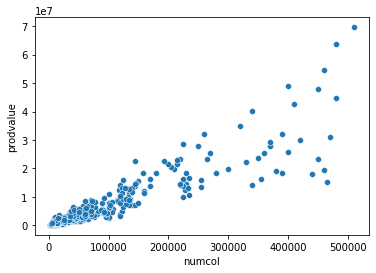

In [10]:
sns.scatterplot(x=df["numcol"], y=df["prodvalue"], data=df)
plt.show()

### <font size=4 color='green'> INFERENCE:
- #### Datapoints are scattered randomly. Data seems like slightly increasing, because in this case the numcol increases, the product value also increases

### <font color='purple'><b>6. Plot and understand the relationship between categorical variable 'year' and a numerical variable'prodvalue' through boxplot, and write your findings.

<AxesSubplot: xlabel='year', ylabel='prodvalue'>

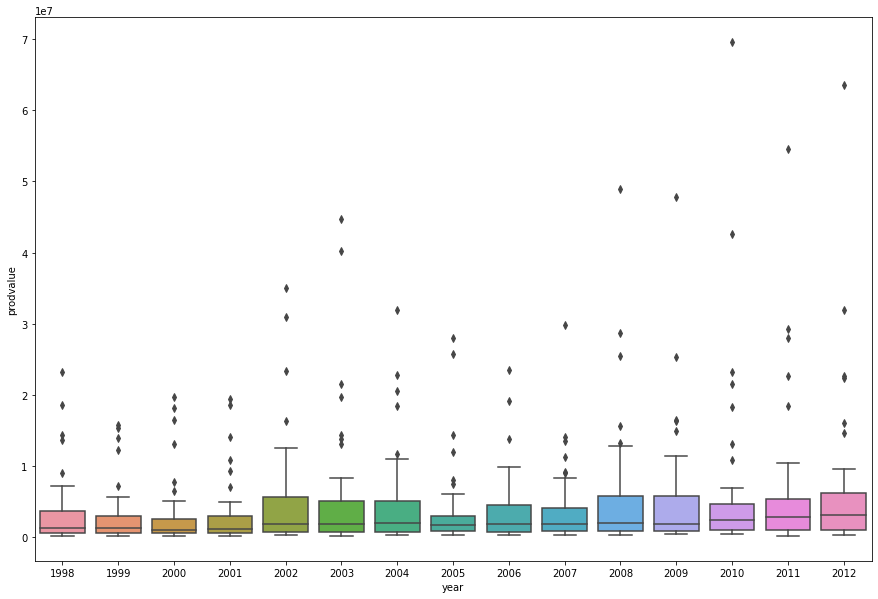

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x="year", y="prodvalue", data=df)

### <font size=4 color='green'> INFERENCE:
- #### Most production values are very low, it seems the productin value for all the years fall under similar range.    

### <font color='purple'><b>7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year').

In [12]:
df.columns

Index(['state', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

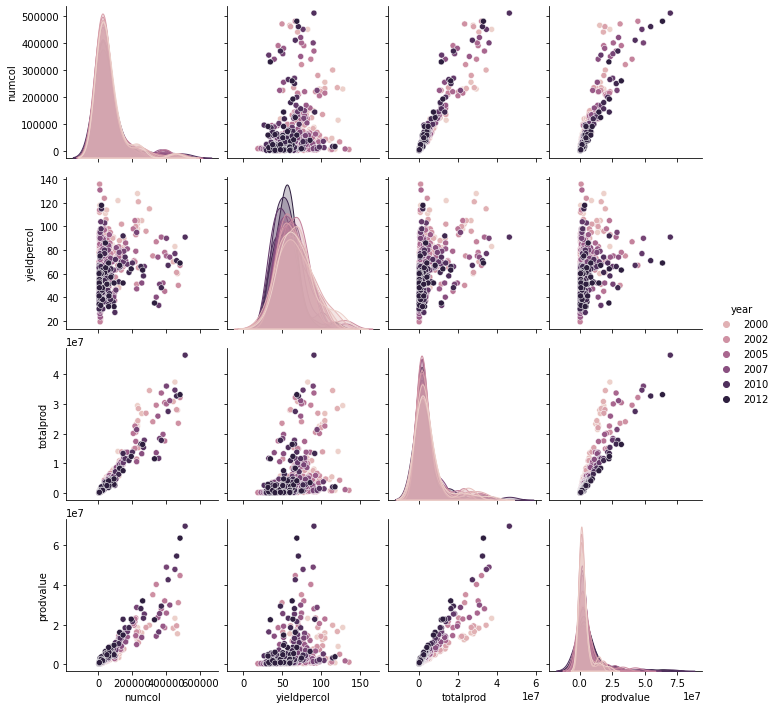

In [13]:
sns.pairplot(df, hue='year', vars=['numcol','yieldpercol','totalprod','prodvalue'])
sns.color_palette("tab10")
plt.show()

### <font size=4 color='green'> INFERENCE:
- #### See that prodvalue and numcol are positively correlated showing that increasing or decreasing the honey producing colonies impacting the Value of production by increasing or decreasing.
- #### From the histograms, we learn that the Totalprod and prodvalue variables are heavily right skewed    

### <font color='purple'><b>8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol','total prod', 'stocks', 'price per lb', 'prodvalue').

In [14]:
df.drop(df.columns[[0, 6, 7]], axis=1, inplace=True)

In [15]:
df.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000


<AxesSubplot: >

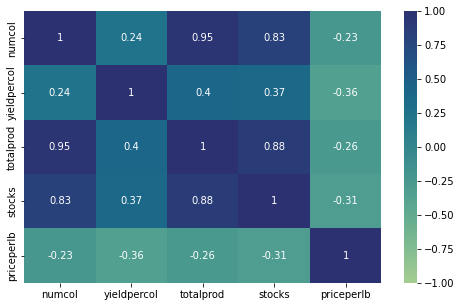

In [16]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="crest",vmin= -1,vmax= 1)

- #### <font size=4 color='green'> INFERENCE:
- #### The correlation between Numcol and Totalprod is 0.95. Both the variables has perfect positive correlation which means if the numcol increases then totalprod also increases, and if the numcol decreases it will similarly react the totalprod.
- #### The correlation between yield percol and priceperlb  is -0.36. Both the variables has perfect negative correlation which means if the yield percol increases then priceperlb will decreases.
- ####  The correlation between numcol and yieldpercol is 0.24. The variables has zero correlation because the correlation value is nearby zero which means there is no specific relation between the two variables.    